# Data Science Assignment by Ubaid Khan
`Through this assignment, I have tried to solve some common data analysis questions and integrate the process of hyposthesis validation through unsupervised learning algorithms to help stakeholders be more confident in the analysis. Here, the Exploratory Data Analysis (EDA) involves using statistics and visualizations to analyze and identify trends in data sets. The primary intent of EDA is to determine whether a predictive model is a feasible analytical tool for business challenges or not.`

# 

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from joblib import dump, load
import seaborn as sns
import os

# 

# Loading and Prepaing Data

In [347]:
df1 = pd.read_csv('DATA/Data(2009-10).csv', encoding = 'unicode_escape')
df2 = pd.read_csv('DATA/Data(2010-11).csv', encoding = 'unicode_escape')
df2 = df2.drop(axis=1,labels={'Unnamed: 0'})
df = pd.concat([df1, df2], axis=0)
df.reset_index(inplace=True)
df = df.drop(axis=1,labels={'index'})

#Adding new column for total pricing
df['Total Cost'] = df['Quantity'] * df['Price']

#Load model
model = load('K-means.joblib')

df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Cost
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0


# 

# Dealing with Missing Values

``Since Customer ID is something unique to each individual, we will be dropping them.``

In [99]:
percent_nan = 100 * (df.isnull().sum() / len(df))
percent_nan.sort_values()

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
Total Cost     0.0
dtype: float64

In [348]:
df = df.dropna()

# 

# Dealing with Outliers

`Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations. Here, we look at the boxplots of two most quantifiable columns and decide of a threshhold to trim down the obvious outliers. Some ways to deal with them include:`

`1. Using scatterplot & boxplot, looking at obvious anomalies.
 2. Using Z-score threshold.
 3. IQR (Inter Quartile Range) trimming.`

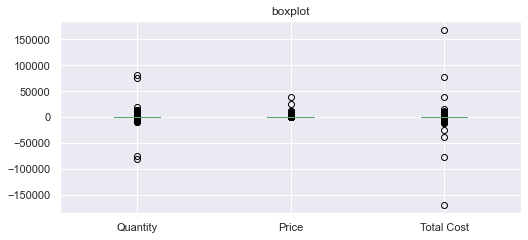

In [90]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = df[['Quantity','Price','Total Cost']]

# Plot the dataframe
ax = data[['Quantity', 'Price', 'Total Cost']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [349]:
df = df[(df['Quantity'] <= 17500) & (df['Quantity'] >= -7700)]
df = df[df['Price'] < 10500]
df = df[(df['Total Cost'] <= 15000) & (df['Total Cost'] >= -10000)]

X = df.drop(labels = {'Invoice','Description','InvoiceDate','StockCode'},axis=1)
X = pd.get_dummies(X)

#Scaling the data for future usage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# 

# Questions

## Q1 Can customers be segmented into different categories? If yes then perform analysis on the same and also propose categories. If no, then explain why?

## ``Answer:`` There are 5940 unique customer IDs from 2009 to 2011. Hence, we will be using a K-means clustering algorithm to form clusters of customer categories and then try defining them manually, in detail using patterns. We found 4 category of customers doing this- 

### `1. Category - A` 
* Region Covered: UK (0.741 million buyers alone)
* Cheap Products
* Lesser Quantities

### `2. Category - B` 
* Region Covered: German buyers (17,624)
* Cheaper Products bought
* High product return rate, lesser loyalty

### `3. Category - C`
* Region Covered: United Arab Emirates  
* Least Percent Returns
* Intermediate Quantities
* Cheaper Products

### `4. Category - D` 
* Region Covered: Almost entire Europe (65,067 buyers)
* Most Loyal Customers with 18.95% orders from the same buyers
* Intermediate Purchases
* High Quantity Orders

### `Please refer to this link to access my notebook containing K-means algorithm build, technical reasonings, and more!`

* [K-means Notebook](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

# 

### Implementing Model for Validation

In [5]:
loaded_model = load('C:/Users/Dr Juned bhai/Desktop/IMPORTANTS/PROJECTS/KIRANA/Section 1/Models/K-means2.joblib')
cluster_labels = loaded_model.fit_predict(scaled_X)
df['Cluster'] = cluster_labels

In [145]:
A = df[df['Cluster'] == 0]
B = df[df['Cluster'] == 1]
C = df[df['Cluster'] == 2]
D = df[df['Cluster'] == 3]

print('Length of A is - {}'.format(len(A)))
print('Length of B is - {}'.format(len(B)))
print('Length of C is - {}'.format(len(C)))
print('Length of D is - {}'.format(len(D)))

Length of A is - 741271
Length of B is - 17624
Length of C is - 386
Length of D is - 65067


# 

## Conclusion-1
### The difference between each of the Customer Categories as found from our algorithmic model. As we can see, Cluster-0 or Category-A is proportionally more in number then the rest. Hence, stating that UK is in fact a potentially critical market in this dataset

<AxesSubplot:ylabel='Count'>

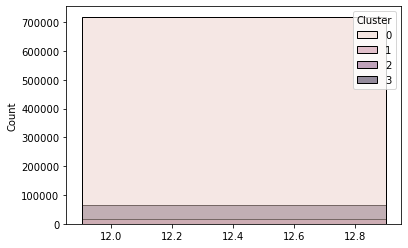

In [71]:
sns.histplot(data=df.tail(800000), x = df["Quantity"].mean(), hue='Cluster')

# 

## Conclusion-2
### Here, we can see the difference between the 'mean' of Price per item in a purchase between different categories of A, B, C, D. Stating that even though 'A' has 0.7+ million orders, their average price per order is still low. Inversely similar conclusion can be made for D, who has 10 times lesser orders than A but double the average price per order.

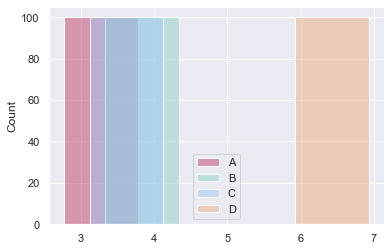

In [157]:
sns.set(style="darkgrid")

sns.histplot(data=A.head(100), x = A["Price"].mean(), color="orange", hue='Cluster', label='A', palette = 'flare')
sns.histplot(data=B.head(100), x = B["Price"].mean(), color="skyblue", hue='Cluster', label='B', palette = 'Set3')
sns.histplot(data=C.head(100), x = C["Price"].mean(), color="orange", hue='Cluster', label='C', palette = 'pastel')
sns.histplot(data=D.head(100), x = D["Price"].mean(), color="red", hue='Cluster', label='D', palette = 'flare')

plt.legend() 
plt.show()

# 

## Conclusion-3
### Below graph shows the difference in the mean quantity per order between the four customer categories. Here, like earlier, Category-A is ranked last and D is ranked first with a 3x difference in value. This, not only makes Category-D the most efficient, but also their customer base the most loyal.

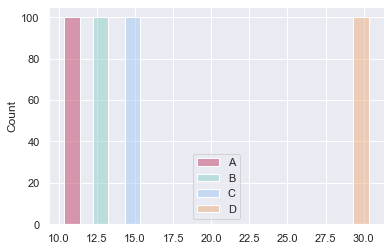

In [158]:
sns.set(style="darkgrid")

sns.histplot(data=A.head(100), x = A["Quantity"].mean(), color="orange", hue='Cluster', label='A', palette = 'flare')
sns.histplot(data=B.head(100), x = B["Quantity"].mean(), color="skyblue", hue='Cluster', label='B', palette = 'Set3')
sns.histplot(data=C.head(100), x = C["Quantity"].mean(), color="orange", hue='Cluster', label='C', palette = 'pastel')
sns.histplot(data=D.head(100), x = D["Quantity"].mean(), color="red", hue='Cluster', label='D', palette = 'flare')

plt.legend() 
plt.show()

# 

## Conclusion-4
### Below graph visualizes the linear relationship between Total Cost & Quantity of orders with the Categorical cluster regions as explaiend earlier. This can be used as a proof of our earlier hypothesis.

<AxesSubplot:xlabel='Quantity', ylabel='Total Cost'>

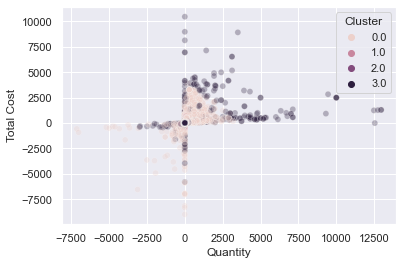

In [161]:
sns.scatterplot(data=df.tail(800000), x = df["Quantity"], y=df["Total Cost"], color="gold", hue='Cluster', alpha=0.3)

# 

## Conclusion-5
### Here, we can see how United Kingdom dominates the other Categories with its high amount of orders.

<AxesSubplot:xlabel='Cluster', ylabel='Count'>

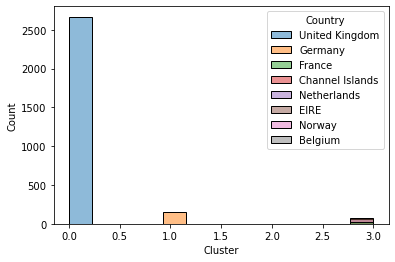

In [65]:
sns.histplot(data=df.tail(3000), x = df["Cluster"], color="teal", hue='Country')

# 

# 

## Q2 How would you define a loyal customer?
## ``Answer:`` Customer loyalty is a measure of a customer's likeliness to do repeat business with a company or brand, no matter how big or small their order or contribution to the company's revenue. Hence, it can be measured using a simple metric such as:

`Loyalty = (No. of Unique Orders) / (No. of Unique Returns)`

### Example: 


In [431]:
def loyalty(customer_id):
    orders = len(df[(df['Customer ID'] == customer_id) & (df['Quantity'] > 0)])
    returns = len(df[(df['Customer ID'] == customer_id) & (df['Quantity'] < 0)])
    Loyalty = orders/returns
    return Loyalty

In [432]:
loyalty(13085)

10.5

# 

# 

## Q3 What is the most popular time of year based on this sales data?
### ``Answer:`` According to our output below, the most popular time for sales is between October to December (Q4) but data shows the concentration to be around December 2010. This conclusion makes sense since a lot of products in the dataset are popular with Christmas (X-mas) theme.

In [355]:
DF = df
DF[['Date','Time']] = DF['InvoiceDate'].str.split(' ', 1, expand=True)
DF['Date']= pd.to_datetime(DF['Date'])

DF['Date'].value_counts(ascending=False)

2010-12-05    5448
2010-12-02    4086
2010-12-08    4042
2010-12-06    3948
2010-12-01    3936
              ... 
2009-12-23     350
2009-12-22     343
2010-01-06     293
2011-02-06     279
2010-12-22     221
Name: Date, Length: 604, dtype: int64

# 

# 

## Q4 Is there any seasonality in data? Explain with supportive evidence.
### ``Answer:`` The below graph findings clearly indicate seasonality around Cluster-3 or Category-D of our buyers, i.e. Europeans. Number of orders hiked in the months of January, April, July, & October in the year 2010.
`

<AxesSubplot:xlabel='Date', ylabel='Quantity'>

C:\Users\Dr Juned bhai\Conda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


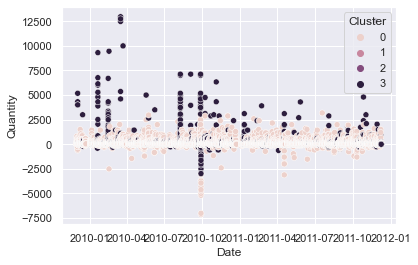

In [254]:
sns.scatterplot(data=DF.head(1000), x=DF['Date'], y=DF['Quantity'], hue=DF['Cluster'])

# 

## Q5 Discuss customer's lifetime with respect to the given dataset.
## ``Answer:`` Here, we are making an assumption that customer's lifetime indicates the Customer Lifetime Value to us. Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship. CLTV demonstrates the implications of acquiring long-term customers compare to short-term customers. Customer lifetime value (CLV) can help you to answers the most important questions about sales to every company:

* How to Identify the most profitable customers?
* How can a company offer the best product and make the most money?
* How to segment profitable customers?
* How much budget need to spend to acquire customers?

## `Customer Lifetime Value (CLV) = Average Order Value * Purchase Frequency`

In [338]:
DF = df
DF = DF[['Customer ID','Total Cost']]
s = DF['Customer ID'].value_counts()

DF1 = pd.DataFrame(s.keys(), columns=['Customer ID'])
DF2 = pd.DataFrame(s.values, columns=['Count'])

DF3 = pd.merge(DF1, DF2, left_index=True, right_index=True)
DF4 = DF.groupby('Customer ID', as_index=False)['Total Cost'].mean()
DF5 = pd.merge(DF3, DF4, on='Customer ID')

DF5['CLV'] = DF5['Total Cost'] * DF5['Count']

In [342]:
DF5.head(5)

,Customer ID,Count,Total Cost,CLV
0,17841.0,13097,5.307795,69516.19
1,14911.0,11613,23.271207,270248.53
2,12748.0,7307,6.838666,49970.13
3,14606.0,6709,4.485673,30094.38
4,14096.0,5128,11.139023,57120.91


# 

`Apart from solving the given 5 questions, I've also tried to give a broader analysis about some specific observations from the data. I hope the readers of my report will find them useful, insightful, and to the point. I will be looking forward to the results of this assignment!`

# Thank you for your time!